In [21]:
from sklearn.decomposition import PCA
import pandas as pd
import models

# Carregue o seu dataframe em uma variável
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
harmonico = 2

df = pd.read_csv(f'{models.path_dados_tratados}/harmonicos_{harmonico}/{dados_normalizados}', header=0)
df = pd.DataFrame(df)[models.colunas]

# Selecione as colunas que você deseja incluir no PCA
colunas_pca = ['rotacao_hz', 'maximo', 'rms', 'assimetria', 'curtose', 'soma_cage_fault', 'soma_outer_race', 'soma_inner_race', 'soma_rotacao_hz']
df_pca = df[colunas_pca]


In [1]:
# Defina o número de componentes principais
num_comp = 5

# Instancie o PCA
pca = PCA(n_components=num_comp)

# Ajuste o PCA ao seu dataframe
df_pca = df.drop(['defeito'], axis=1)
pca.fit(df_pca)

# Transforme o dataframe original com base nas componentes principais do PCA
df_pca_transformado = pca.transform(df_pca)

# Crie um novo dataframe com as componentes principais
df_pca_resultado = pd.DataFrame(data = df_pca_transformado, columns = [f'PC{i+1}' for i in range(num_comp)])

lista_dataframes = [df_pca_resultado,df['defeito']]
df = pd.concat(lista_dataframes, axis=1)
# Imprima o novo dataframe
print(df)


NameError: name 'PCA' is not defined

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models

In [24]:
# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [25]:
# Treina o classificador
clf = DecisionTreeClassifier()
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)


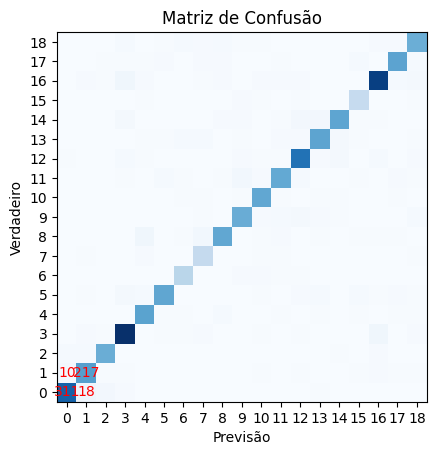

A precisão do classificador é: 87.4 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.95      0.90      0.92       345
               ball_fault_baixo       0.86      0.89      0.87       245
               ball_fault_medio       0.92      0.92      0.92       212
                cage_fault_alto       0.88      0.91      0.90       421
               cage_fault_baixo       0.85      0.91      0.88       231
               cage_fault_medio       0.92      0.83      0.87       247
 desalinhamento_horizontal_alto       0.83      0.90      0.87       123
desalinhamento_horizontal_baixo       0.73      0.89      0.80       109
desalinhamento_horizontal_médio       0.89      0.83      0.86       246
   desalinhamento_vertical_alto       0.85      0.86      0.86       227
  desalinhamento_vertical_baixo       0.86      0.94      0.90       218
  desalinhamento_vertical_médio       0.86      0.83    

In [26]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))